# Лекция №2. Простые скрипты

*П.Н. Советов, РТУ МИРЭА*

In [7]:
import io
from graphviz import Digraph
from railroad import Diagram, Optional, Choice, Sequence
from IPython.display import SVG, display

def show_diagram(d):
    with io.StringIO() as f:
        Diagram(d).writeSvg(f.write)
        display(SVG(f.getvalue()))

def edge(d, source, targets):
    for target in targets.split():
        d.edge(source, target)

## Типы данных

В Питоне значения различных типов являются объектами. Важно учитывать, что объекты передаются (при присваиваниях и использовании в качестве аргументов) по ссылке, а не копируются. Типы данных в Питоне делятся на изменяемые (mutable) и неизменяемые (immutable). У объекта изменяемого типа содержимое может быть модифицировано. 

На рисунке ниже показаны основные встроенные типы данных языка Питон.

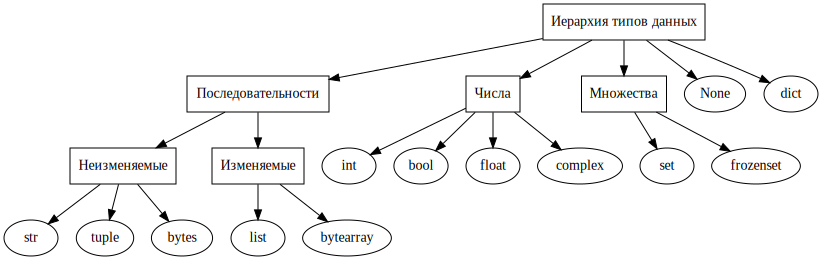

In [8]:
d = Digraph()
d.attr('node', shape='box')
d.node('n1', 'Иерархия типов данных')
d.node('n2', 'Последовательности')
d.node('n3', 'Неизменяемые')
d.node('n4', 'Изменяемые')
d.node('n5', 'Числа')
d.node('n6', 'Множества')
d.attr('node', shape='oval')
d.node('n7', 'None')
d.node('n8', 'dict')
d.node('n9', 'int')
d.node('n10', 'bool')
d.node('n11', 'float')
d.node('n12', 'complex')
d.node('n13', 'set')
d.node('n14', 'frozenset')
d.node('n15', 'str')
d.node('n16', 'tuple')
d.node('n17', 'bytes')
d.node('n18', 'list')
d.node('n19', 'bytearray')
edge(d, 'n1', 'n2 n5 n6 n7 n8')
edge(d, 'n2', 'n3 n4')
edge(d, 'n5', 'n9 n10 n11 n12')
edge(d, 'n6', 'n13 n14')
edge(d, 'n3', 'n15 n16 n17')
edge(d, 'n4', 'n18 n19')
d

К изменяемым типам данных относятся:
* список `list`,
* словарь `dict`,
* множество `set`,
* байтовый массив `bytearray`.

В Питоне некоторые типы данных имеют общее название — последовательности. Существует ряд общих операций, применимых для всех последовательностей: обращение по индексу, получение длины и другие.

К типам-последовательностям относятся:
* строка `str`,
* список `list`,
* кортеж `tuple`,
* байтовая последовательность `bytes`,
* байтовый массив `bytearray`.

Для создания и преобразования объектов различных типов могут быть использованы встроенные функции. Ниже приведены некоторые примеры работы этих функций.

```Python
str(42) = '42'
int('0123') = 123
list('0123') = ['0', '1', '2', '3']
tuple('0123') = ('0', '1', '2', '3')
str([-1, 1]) = '[-1, 1]'
tuple([-1, 1]) = (-1, 1)
str((2, 4)) = '(2, 4)'
list((2, 4)) = [2, 4]
str({'a': 1, 'b': 2}) = "{'a': 1, 'b': 2}"
list({'a': 1, 'b': 2}) = ['a', 'b']
tuple({'a': 1, 'b': 2}) = ('a', 'b')
```

В практике прикладного программирования на Питоне среди упомянутых выше новых типов данных наиболее популярны строки, списки, кортежи и словари. Работу с этими типами данных нужно изучить в первую очередь.

В Питоне есть средства для создания пользовательских типов данных. Кроме рассматриваемых здесь встроенных типов данных существуют прикладные типы данных, реализованные на уровне стандартной библиотеки.

### Ничто или None

Тип `NoneType` имеет единственный элемент `None`, который обозначает отсутствие или необязательность значения. При вычислении условий `None` трактуется, как `False`.

Функция, в которой явно не задано возвращаемое значение, возвращает `None`.

In [9]:
def f():
    pass

print(type(f()))

<class 'NoneType'>


Обратите внимание, что в Питоне не разрешено использовать пустые блоки. Нужного эффекта, как показано выше, можно добиться с помощью ключевого слова `pass`.

Для определения констант нет специального синтаксиса, но, по соглашению, имена переменных, используемых в качестве констант, записываются в верхнем регистре:

In [2]:
MAX_SIZE = 100

### Строки

Строки могут быть записаны различными способами:

In [3]:
s1 = 'строка в одинарных кавычках'
s2 = "строка в двойных кавычках"
s3 = '''
многострочный
текст
'''
s4 = """
другой
многострочный
текст
"""

Строковой литерал с тройными кавычками можно также использовать для определения многострочного комментария.

Строковой литерал в начале тела функции играет роль документации (docstring):

In [4]:
def some_function():
    '''
    Эта функция еще не реализована.
    '''
    return 0

Документацию по выбранной функции можно получить с помощью `help()`:

In [5]:
help(some_function)

Help on function some_function in module __main__:

some_function()
    Эта функция еще не реализована.



In [6]:
help(max)

Help on built-in function max in module builtins:

max(...)
    max(iterable, *[, default=obj, key=func]) -> value
    max(arg1, arg2, *args, *[, key=func]) -> value
    
    With a single iterable argument, return its biggest item. The
    default keyword-only argument specifies an object to return if
    the provided iterable is empty.
    With two or more arguments, return the largest argument.



Строки представляют собой последовательности значений Юникода. В Питоне отсутствует отдельный тип символа (char), вместо него используются строки единичной длины.

Для получения символа по его коду и кода по символу имеются соответствующие функции:

In [7]:
print(chr(48), ord('0'))

0 48


С использованием ключевого слова in можно проверить наличие заданной подстроки в строке:

In [8]:
'two' in 'one,two,tree'

True

In [1]:
'four' not in 'one,two,tree'

True

Важно помнить, что строку нельзя модифицировать:

In [9]:
s = 'python'
# s[0] = 'P' приведет к ошибке

Вместо модификации текущей строки необходимо создать новую строку из уже имеющихся:

In [10]:
'P' + s[1:]

'Python'

### Срезы

В примере выше использовалась очень популярная операция над последовательностями в Питоне — взятие среза.

В срезе s[i:j] полученная подпоследовательность включает в себя элементы с индексами из $[i, j)$.

Проиллюстрируем работу срезов на примерах:

In [11]:
s[1:] # от s[1] до s[len(s) - 1]

'ython'

In [12]:
s[:3] # от s[0] до s[2]

'pyt'

Индекс -1 обозначает индекс последнего элемента последовательности. В общем случае обращение по отрицательному индексу `s[-i]` трактуется, как `s[len(s) - i]`.

In [13]:
s[-1], s[-5:-1], s[len(s) - 5:len(s) - 1]

('n', 'ytho', 'ytho')

In [14]:
s[1:-1] # от s[1] до s[len(s) - 2]

'ytho'

In [15]:
s[::2] # от s[0] до s[len(s) - 1] с шагом 2

'pto'

Для неизменяемой последовательности, примером которой является строка, определен ряд общих операций:

| Операция         | Описание                                |
|------------------|-----------------------------------------|
|      x in s      | Проверка на наличие x в s             |
|    x not in s    | Проверка на отсутствие x в s            |
|      s1 + s2     | Соединение последовательностей          |
| s * n            | Последовательность из n повторений s    |
| s[i]             | Получение элемента по индексу           |
| s[i:j], s[i:j:k] | Получение подпоследовательности (среза) |
| len(s)           | Длина s                                 |
| max(s), min(s)   | Максимальный/минимальный элемент в s    |
| s.index(x)       | Индекс первого вхождения x в s          |
| s.count(x)       | Количество вхождений x в s              |

Для экранирования специальных символов в Питоне используются знакомые программистам на C++ средства:

In [16]:
print('first\nsecond')

first
second


При необходимости, интерпретацию специальных символов можно отключить при использовании строкового литерала с префиксом r:

In [17]:
print(r'first\nsecond')

first\nsecond


В функции `print` могут использоваться дополнительные именованные аргументы:
* `sep` для разделения обычных аргументов заданной строкой,
* `end` для указания окончания строки при выводе на экран. Позволяет выводить текст без перевода на новую строку.

In [18]:
print('логин', 'пароль', 'почта', sep=':')
print('начало', end='...')
print('завершение')

логин:пароль:почта
начало...завершение


В цикле `for`, помимо итератора `range()` может использоваться и значение типа последовательность, как показано в примере ниже.

In [19]:
for c in s:
    print(c.upper(), end=' ')

P Y T H O N 

Следует избегать построения длинных строк с помощью тяжеловесной операции `+` (конкатенации). Большей производительности можно достичь с помощью метода `join()`, как показано ниже:

In [20]:
alpha = range(ord('А'), ord('Я') + 1)
''.join([chr(c) for c in alpha])

'АБВГДЕЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯ'

Описание других методов для работы со строками в Питоне можно найти в [официальной документации](https://docs.python.org/3/library/stdtypes.html#string-methods).

### Форматирование строк

В Питоне имеется несколько способов форматирования строк. В частности, поддерживается форматирование в стиле printf из С/C++, с использованием операции `%`:

In [21]:
x = 42
pi = 3.14159265359
print('x: %d' % x)
print('значения: %s, %.2f' % (s, 1.2345))

x: 42
значения: python, 1.23


Также может использоваться строковой метод `format()`:

In [22]:
print('значения: {:s}, {:d}, {:.2f}'.format(s, x, pi))
print('значения: {s:s}, {x:d}, {pi:.2f}'.format(s=s, x=x, pi=pi))

значения: python, 42, 3.14
значения: python, 42, 3.14


Все большую популярность приобретает еще один метод форматирования — с помощью f-строк:

In [23]:
print(f'значения: {s:s}, {x:d}, {pi:.2f}')

значения: python, 42, 3.14


В случае f-строк лучше не перегружать шаблон форматирования кодом на Питоне, поскольку это ухудшает читаемость программы.

Подробности о языке форматирования строк приведены в [официальной документации](https://docs.python.org/3/library/string.html#formatstrings).

### Списки

Список в Питоне имеет обманчивое название. Это не связный список, а динамический массив, элементами которого могут выступать объекты произвольных типов.

Важно учитывать, что списки являются изменяемыми и передаются по ссылке, а не по значению, как показано в примере ниже.

In [24]:
s1 = [1, 2]
s2 = ['список', s1, s1]
print(s2)
s1[0] = None
print(s2)

['список', [1, 2], [1, 2]]
['список', [None, 2], [None, 2]]


Рассмотренная в примере ситуация изображена на картинке ниже.

![](images/list_objects.png)

Попробуйте поэкспериментировать со списками с помощью сайта [pythontutor.com](http://pythontutor.com/).

По возможности, следует использовать неизменяемые типы данных, поскольку, как видно в примере выше, модификация списка может привести к неожиданным результатам и ошибкам, которые, зачастую, трудно обнаружить. В частности, не следует модифицировать список в цикле прохода по элементам этого списка.

Для списков и других изменяемых последовательностей используются те же общие операции, что и для строк, а также иных неизменяемых последовательностей. Кроме того, существует ряд операций, специально предназначенных для изменяемых последовательностей:

| Операция                           | Описание                                        |
|------------------------------------|-------------------------------------------------|
|              s[i] = x              | Заменить элемент по индексу                     |
|    s1[i:j] = s2, s1[i:j:k] = s2    | Переписать срез              |
| del s[i], del s[i:j], del s[i:j:k] | Удалить элемент или срез       |
| s.append(x)                        | Добавить в конец s элемент x                    |
| s.clear()                          | Удалить все элементы из s                       |
| s[:], s.copy()                     | Получить копию s (копируются ссылки на объекты) |
| s1 += s2, s1.extend(s2)            | Добавить к s1 последовательность s2             |
| s.insert(i, x)                     | Вставить x в s по индексу                       |
| s.pop(), s.pop(i)                           | Вытолкнуть последний элемент из s или по индексу              |
| s.remove(x)                        | Удалить первое вхождение x из s                 |
| s.reverse()                        | Обратить последовательность                     |

Следующие операции над списком имеют вычислительную сложность O(1):
* `s.append(x)`,
* `s.pop()`,
* `s[i]`,
* `s[i] = x`,
* `len(s)`.

### Списковые включения

Списковые включения в Питоне представляют собой способ компактного описания порождения списка. Нотация вдохновлена математической записью для построения множества, а также языком программирования SETL.

В математике множество квадратов чисел от 1 до 9 можно определить, как

$$
\{n^2: \forall n \in N, 1 \le n \lt 10 \}
$$

В Питоне список, который содержит приведенное выше множество чисел, можно описать следующим образом:

In [26]:
[n ** 2 for n in range(1, 10)]

[1, 4, 9, 16, 25, 36, 49, 64, 81]

При генерации списка можно указать дополнительное условие, как показано в примере ниже:

In [27]:
# Список четных чисел в заданном диапазоне
[n for n in range(1, 10) if n % 2 == 0]

[2, 4, 6, 8]

Упрощенный шаблон спискового включения выглядит так:

```Python
[выражение for переменная in последовательность if условие]
```

Это соответствует следующему псевдокоду:

```Python
результат = []
for переменная in последовательность:
    if условие:
        результат.append(выражение)
```

Реальный синтаксис спискового включения сложнее, поскольку допускает вложенность, которой иногда программисты злоупотребляют.

Далее представлена железнодорожная диаграмма синтаксиса включения (`включение-for`). Этот синтаксис является общим для порождения списков, словарей и множеств.

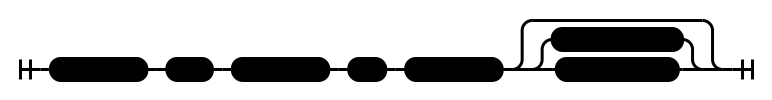

In [27]:
show_diagram(Sequence('выражение', 'for', 'выражение', 'in', 'выражение',
             Optional(Choice(1, 'включение for', 'включение if'))))

Часть `включение if`:

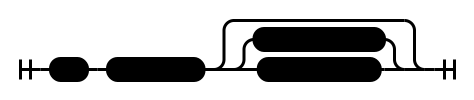

In [28]:
show_diagram(Sequence('if', 'выражение', Optional(Choice(1, 'включение for', 'включение if'))))

В Питоне отсутствует встроенный тип многомерного массива. Тем не менее, имитировать многомерный массив можно с помощью вкладывания обычных списков друг в друга, как показано в примере ниже.

In [28]:
arr = [[x * y for x in range(5)] for y in range(3)]
for y in range(3):
    for x in range(5):
        print(f'arr[{y},{x}]={arr[y][x]}', end=' ')
    print()

arr[0,0]=0 arr[0,1]=0 arr[0,2]=0 arr[0,3]=0 arr[0,4]=0 
arr[1,0]=0 arr[1,1]=1 arr[1,2]=2 arr[1,3]=3 arr[1,4]=4 
arr[2,0]=0 arr[2,1]=2 arr[2,2]=4 arr[2,3]=6 arr[2,4]=8 


### Кортежи

Кортеж является неизменяемым вариантом списка. Запись кортежа имеет особенности, как показано далее.

In [29]:
# Пустой кортеж
() 
# Кортеж из одного элемента,
# запятая нужна, чтобы отличать от выражения в скобках
('single',) 
# Еще один кортеж
(1, 2, ["three", 4])
# Скобки можно опустить, важны запятые
1, 2

(1, 2)

Последний из вышеприведенных примеров показывает, как в Питоне реализовано возвращение нескольких результатов из функции. Это делается с помощью кортежа:

In [30]:
def addsub(x, y):
    return x + y, x - y

print(addsub(1, 2), type(addsub(1, 2)))

(3, -1) <class 'tuple'>


С помощью кортежей можно организовать множественное присваивание значений переменных:

In [31]:
data = ['Python', ('strong', 'dynamic'), 30]
language, (ty1, ty2), value = data
print(language, value)
ty1, ty2 = ty2, ty1
print(ty1, ty2)

Python 30
dynamic strong


Множественное присваивание удобно использовать в цикле `for` с итератором `enumerate()`, позволяющим получить как индекс, так и значение для элементов последовательности:

In [32]:
for i, x in enumerate('abcdef'):
    print(i, x, sep=':', end=' ')

0:a 1:b 2:c 3:d 4:e 5:f 

### Словари

Словарь в Питоне представляет собой изменяемую хеш-таблицу. Ключом в словаре может быть любое хешируемое значение (для которого можно использовать встроенную функцию `hash()`). На практике это означает, что ключом должен быть неизменяемый объект (элементы которого тоже неизменяемы), такой, например, как строка. 

Ниже показаны различные способы определения словаря: с помощью перечисление пар ключ-значения, с помощью аналога спискового включения для словарей и с помощью конструктора `dict`.

In [33]:
{} # Пустой словарь
print({'language':'Python', 'score': 1.0})
print({k: v for k, v in [('language', 'Python'), ('score', 1.0)]})
print(dict(language='Python', score=1.0))

{'language': 'Python', 'score': 1.0}
{'language': 'Python', 'score': 1.0}
{'language': 'Python', 'score': 1.0}


Следующие операции над словарем в Питоне имеют вычислительную сложность O(1):
* `k in d`,
* `d[k]`,
* `d[k] = x`,
* `del d[k]`.

Порядок вставленных элементов по ключу в словаре в новых версиях языка (старше 3.6) сохраняется:

In [34]:
d = {}
d['tree'] = 3
d['two'] = 2
d['one'] = 1
for k, v in d.items(): # аналог enumerate() для словаря
    print(k, v)

tree 3
two 2
one 1


Обращение по несуществующему ключу в словаре вызывает ошибку (исключение). Метод `get()` удобно использовать в тех случаях, когда при обращении по новому ключу достаточно подставить значение по умолчанию, не изменяя словарь:

In [1]:
d = dict(a=1, b=2)
for k in 'abc':
    print(k, d.get(k, 3), end=' ')

a 1 b 2 c 3 

### Множества

Тип множество понимается в математическом смысле — как коллекция неупорядоченных объектов. Задается множество, аналогично словарю, с помощью фигурных скобок, но без указания ключей. При это многие операции имеют названия, отличные от общих для типов-последовательностей:

In [35]:
firms = {'Yandex', 'Yandex', 'JetBrains', 'MCST'}
set(['Yandex', 'JetBrains', 'MCST']) # еще один вариант определения множества
firms.add('Kaspersky')
firms.remove('JetBrains')
print(firms, 'Kaspersky' in firms, {x for x in firms if 'a' in x})

{'Kaspersky', 'Yandex', 'MCST'} True {'Kaspersky', 'Yandex'}


Над типом множество поддерживаются также операции объединения, пересечения и другие операции, описание которых приведено в [официальной документации](https://docs.python.org/3/library/stdtypes.html#set-types-set-frozenset).

## Идентичность объектов

Как мы уже знаем, Питон оперирует объектами различных типов. Помимо типа и значения, каждый объект характеризуется уникальным числом — в реализации CPython это адрес объекта в памяти. Для получения адреса используется встроенная функция `id()`.

In [36]:
s1, s2 = [1, 2], [1, 2]
s3 = [s1, s1, s2]
print(s3, [hex(id(x)) for x in s3])

[[1, 2], [1, 2], [1, 2]] ['0x1da0018e400', '0x1da0018e400', '0x1da001e1400']


С помощью проверки адресов можно установить идентичность двух объектов. Для этого используется операция `x is y`, которая эквивалентна следующему выражению: `id(x) == id(y)`. При этом надо различать проверку на равенство (`==`) и на идентичность (`is`):

In [37]:
s1 == s2, s1 is s2

(True, False)

В прикладных программах `is` наиболее часто используется для сравнения с `None`. Поскольку `None` является уникальным объектом, то принято писать `x is None` или `x is not None`, вместо `x == None` или `x != None`.

## Еще раз о функциях

В Питоне аргументы функции передаются по ссылке, а не копируются при вызове функции. Аргументы и определенные внутри функции переменные попадают в локальную область видимости функции (`locals()`). 

Иногда возникает необходимость изменить глобальные данные из функции. Это можно сделать с помощью ключевого слова `global`:

In [38]:
Counter = 0

def f():
    # без этого объявления речь шла об увеличении локальной переменной
    global Counter 
    Counter += 1
    return Counter
    
print(f(), f(), f(), Counter)

1 2 3 3


При этом использование `global`, как и в других языках, не является признаком хорошего тона. С помощью функций, классов и модулей в большинстве случаев удается обойтись без модификации глобальных объектов.

Вызывать функцию можно как с позиционными (тот вариант, который мы использовали ранее), так и с именованными аргументами:

In [39]:
def f(name, age):
    return f'{name}: {age}'
    
print(f('Иван', 20), f(name='Михаил', age=19), sep=', ')

Иван: 20, Михаил: 19


В функциях могут использоваться аргументы по умолчанию. Они располагаются после всех обязательных аргументов:

In [40]:
def f(name, age=20):
    return f'{name}: {age}'
    
print(f('Иван'), f(name='Михаил', age=19), sep=', ')

Иван: 20, Михаил: 19


Аргументы по умолчанию получают свои значения во время определения функции. В результате может сложиться проблемная ситуация, как в примере ниже:

In [41]:
def f(lst=[]):
    lst.append(len(lst))
    return lst

[f() for i in range(4)]

[[0, 1, 2, 3], [0, 1, 2, 3], [0, 1, 2, 3], [0, 1, 2, 3]]

Чтобы избежать неочевидного поведения аргументов, следует в качестве значений по умолчанию использовать неизменяемые объекты.

Переменные, заданные в списковых (и прочих) включениях, имеют время жизни, ограниченное включением:

In [42]:
def f():    
    return [0 for i in range(4)], 'i' in locals()

print(f())

([0, 0, 0, 0], False)


Для установления времени жизни переменных, определенных в цикле `for`, используются более запутанные правила:

In [43]:
def f():
    for i in range(4):
        pass
    for j in range(0): # цикл не выполняется
        pass
    return i, 'i' in locals(), 'j' in locals()

print(f())

(3, True, False)


## Пример использования рассмотренных средств языка

В программе ниже организован разбор формальной грамматики, представленной в БНФ, а также порождение случайных фраз по заданной грамматике.

В нотации используются:
* альтернативный выбор (`a | b`),
* последовательность (`a b`), 
* рекурсия (`a = a | b`).

Видите ли вы аналогию с ранее рассмотренными железнодорожными диаграммами?

Постарайтесь самостоятельно разобраться, как работает эта программа. Описание неизвестных для вас методов и функций смотрите в официальной документации.

In [44]:
import random


def parse_bnf(text):
    '''
    Преобразовать текстовую запись БНФ в словарь.
    '''
    grammar = {}
    rules = [line.split('=') for line in text.strip().split('\n')]
    for name, body in rules:
        grammar[name.strip()] = [alt.split() for alt in body.split('|')]
    return grammar


def generate_phrase(grammar, start):
    '''
    Сгенерировать случайную фразу.
    '''
    if start in grammar:
        seq = random.choice(grammar[start])
        return ''.join([generate_phrase(grammar, name) for name in seq])
    return str(start)


BNF = '''
V = x | y | z
D = 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9
N = D | D N
O = + | - | * | /
E = V | N | ( E ) | E O E
'''

for i in range(10):
    print(generate_phrase(parse_bnf(BNF), 'E'))

(7-5/z*(z/3-58555808+z-y)*19)
((z))
z
((810-(392))-x+((4156+841)+49750))/((x))
((y-z-(597)-3-8/x-(1)))
6
x
z
20
0


## Работа с файлами

В Питоне имеется встроенная функция `open()` для открытия файлов.

Прочесть данные из файла:

```Python
f = open('data.txt', 'r')
data = f.read()
f.close()
```

Записать данные в файл:

```Python
f = open('data.txt', 'w')
f.write(data)
f.close()
```

Как и в C++, добавление 'b' к строкам 'r' или 'w' означает открытие файла в двоичном режиме.

Чтобы не беспокоиться о закрытии файла удобно использовать менеджер контекста с помощью ключевого слова `with`:

```Python
with open('data.txt', 'r') as f:
    data = f.read()
```

или

```Python
with open('data.txt', 'w') as f:
    f.write(data)
```

Файл будет автоматически закрыт по выходу из блока `with`.

## Интерфейс командной строки

Простые скрипты в Питоне обычно представляют собой собой программы, имеющие интерфейс командной строки.
Аргументы, передаваемые на вход программы из командной строки, хранятся в списке `sys.argv`. Рассмотрим следующую программу:

```Python
import sys

print(sys.argv)
```

Если вызвать ее из командной строки с помощью `python cli.py -o file.dat 123`, то будет получен следующий результат:

```
['cli.py', '-o', 'file.dat', '123']
```

Для удобного разбора опций командной строки имеется модуль `argparse`, описание которого приведено в [официальной документации](https://docs.python.org/3/library/argparse.html).

Краткое руководство по хорошему стилю определения опций командной строки находится [здесь](https://nullprogram.com/blog/2020/08/01/) (англ.).